# ECC Demonstration

Import my ECC package into the environment

In [1]:
from ECC import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 17

Generate a set of ECC keys with appropriate bitsize

In [3]:
ECC_keys = generate_ECC.KeyGen(bitSize, True, True)     # initalise object True sets verbose and demo flag on KeyGen
ECC_keys.generateCurve()                                # create a curve
ECC_keys.generateKeys()                                 # runs generator

Generating  17 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  54
New candidate... 82131
New candidate... 107291
New candidate... 106679
New candidate... 86513
New candidate... 100429
New candidate... 118663
New candidate... 100285
New candidate... 123685
New candidate... 104663
New candidate... 66153
New candidate... 78893
Prime of  17 bits found: 78893
Checked 11 candidates in 0.01 s

Checking: y^2 = x^3 + 5x + 6 % 78893

y^2 = x^3 + 5x + 6 % 78893
Checked 1 curves
k = 27744  G = (34203, 57112)   Q = (6523, 21503)
Public-Key: {
    Curve: y^2 = x^3 + 5x + 6 % 78893
    Base-Point: (34203, 57112)
    Order(Base): 39496
    Public-Point: (6523, 21503)
}
Private-Key: 27744
n is 17 bits



True

### Brute Force Algorithm

In [4]:
# pass it public keys, and True verbose & demo flag
bf = brute_force.BFSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
bf.solve()                                                                

'27744.G = (6523, 21503)'

k: 27744
Time taken: 1.009 s
Space used: 4 bytes
Numbers checked: 27744


True

### Pollard's-$\lambda$ method

In [ ]:
# pass it public keys, and True verbose & demo flag
lamb = pollard_lambda.PLSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
lamb.solve()  

'Trap: (34203, 57112) Wild: (34203, 57112)'

k: 27744
Time taken: 1.388 s
Space used: 80 bytes
Numbers checked: 7890


True

### Make it a bit harder

In [ ]:
bitSize = 26

ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
ECC_keys.generateCurve()                          # create a curve
ECC_keys.generateKeys()                           # runs generator

Prime of  26 bits found: 44023697
Checked 1 candidates in 0.00 s

y^2 = x^3 + 8x + 8 % 44023697
Checked 1 curves
k = 28096604  G = (4340680, 3283973)   Q = (13480831, 37614933)
Public-Key: {
    Curve: y^2 = x^3 + 8x + 8 % 44023697
    Base-Point: (4340680, 3283973)
    Order(Base): 44024289
    Public-Point: (13480831, 37614933)
}
Private-Key: 28096604
n is 26 bits



True

### Baby Step - Giant Step Algorithm

In [ ]:
# pass it public keys, and True verbose & demo flag
bsgs = baby_step.BGSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)    
# run solver
bsgs.solve()                                                              

'(13480831, 37614933) - (4340680, 3283973) * 28090188 = (23506387, 40329025)'

k: 28096604
Time taken: 2.230 s
Space used: 53096 bytes
Numbers checked: 10871


True

### Pohlig-Hellman

In [ ]:
# pass it public keys, and True verbose & demo flag
ph = pohlig_hellman.PHSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
# run solver
ph.solve()  

{3: 1, 47: 1, 312229: 1}
3^1: G'=(44007973, 36948361) Q'=(44007973, 7075336); ord = 3
47^1: G'=(32720102, 23113472) Q'=(401663, 13902372); ord = 47
312229^1: G'=(35502936, 23417960) Q'=(17443688, 43746279); ord = 312229
k: 28096604
Time taken: 0.257 s
Space used: 1123
Numbers checked: 1125


True

### Pollard's-$\rho$ method

In [ ]:
# pass it public keys, and True verbose & demo flag
rho = pollard_rho.PRSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True)   
# run solver
rho.solve()                                                                

'X: (34583685, 8222094) Y: (34583685, 8222094)'

k: 28096604
Time taken: 1.108 s
Space used: 72 bytes
Numbers checked: 8629


True

### MOV Attack

In [ ]:
from IPython.display import display, clear_output

solved = False
bitSize = 12

while not solved:
    clear_output(wait=True)
    
    ECC_keys = generate_ECC.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
    ECC_keys.generateCurve()                          # create a curve
    ECC_keys.generateKeys()                           # runs generator

    # pass it public keys, and True verbose & demo flag
    mov = mov_attack.MOVSolver(ECC_keys.curve, ECC_keys.Q, ECC_keys.G, True, True) 
    # run solver
    mov.solve()  
    
    solved = mov.k == ECC_keys.k

Prime of  12 bits found: 2371
Checked 4 candidates in 0.00 s

y^2 = x^3 + 7x % 2371
Checked 1 curves
k = 1982  G = (1352, 1446)   Q = (1411, 1235)
Public-Key: {
    Curve: y^2 = x^3 + 7x % 2371
    Base-Point: (1352, 1446)
    Order(Base): 2372
    Public-Point: (1411, 1235)
}
Private-Key: 1982
n is 12 bits

[[1105*a + 1025, 626*a + 1421], [1556*a + 595, 439*a + 2275]]
2240*a + 806 2020*a + 2350 2372
k: 1982
Time taken: 0.002 s
Space used: 28900 bytes
Numbers checked: 85


### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [ ]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

<IPython.core.display.Javascript object>


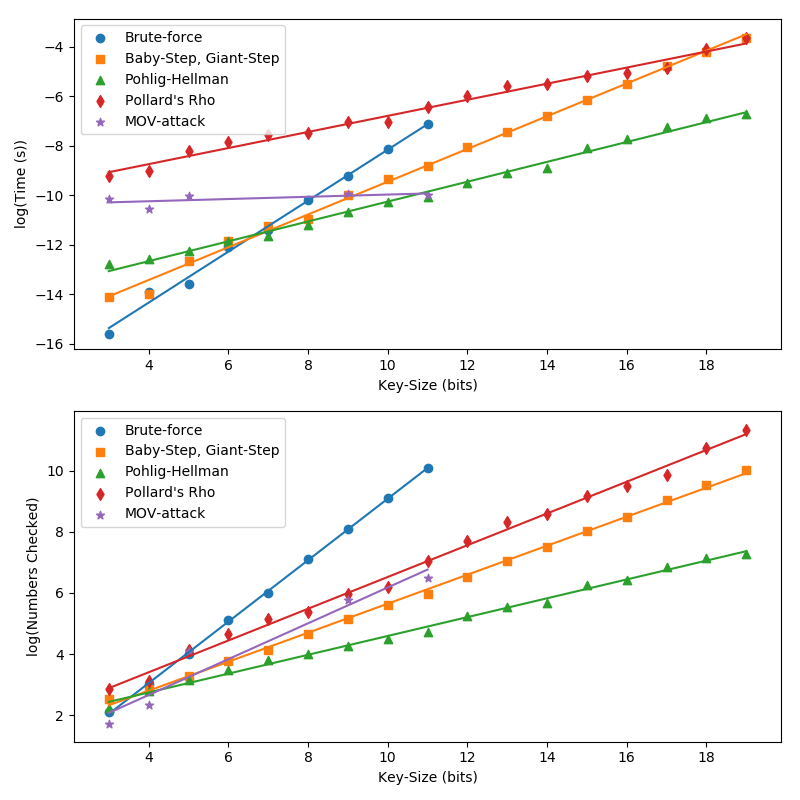

[[13*a + 18, 8*a + 15], [5*a + 17, 11*a + 14]]
[[711*a + 549, 129*a + 192], [795*a + 701, 663*a + 332]]


C:\Users\alexj\Google Drive\Documents\University\Year 3\Individual Project\Programming\utils\plots.py:84: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(keys, vals, 1))
C:\Users\alexj\Google Drive\Documents\University\Year 3\Individual Project\Programming\utils\plots.py:84: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(keys, vals, 1))
C:\Users\alexj\Google Drive\Documents\University\Year 3\Individual Project\Programming\utils\plots.py:84: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(keys, vals, 1))
C:\Users\alexj\Google Drive\Documents\University\Year 3\Individual Project\Programming\utils\plots.py:84: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(keys, vals, 1))
C:\Users\alexj\Google Drive\Documents\University\Year 3\Individual Project\Programming\utils\plots.py:84: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(keys, vals, 1))
C:\Users\alexj\Googl

[[6*a + 7, 2], [5*a + 2, 10*a + 9]]
[[9*a + 1, 13*a + 7], [7*a + 9, 12*a + 2]]
[[6*a + 4, a], [3*a + 1, a + 4]]
[[a + 5, 5*a + 2], [1, 5*a + 6]]
[[4*a + 1, 4*a + 1], [5*a + 3, 5]]
[[6*a + 10, 5*a + 4], [6*a + 9, 3*a + 9]]
[[9*a + 15, 11*a + 8], [a + 4, 18*a + 8]]
[[6*a + 8, 6], [4, 4*a + 2]]
[[3*a + 6, 8*a + 4], [8*a + 2, a + 9]]
[[4*a + 4, 5], [2*a + 4, 0]]
[[5*a + 5, 2*a + 9], [3*a + 4, 4*a + 10]]
[[8*a + 2, 3*a + 2], [6*a + 10, 8*a + 3]]
[[22*a + 37, 41*a + 19], [42*a + 10, 15*a + 15]]
[[2*a + 2, 4*a + 4], [5*a + 6, 4*a + 6]]
[[5*a + 5, 5*a + 1], [3*a + 2, 4*a + 5]]
[[a + 6, a + 4], [2*a + 2, 6]]
[[15*a + 9, 3*a + 15], [12*a + 15, 8*a + 17]]
[[6*a + 9, 4*a + 1], [2*a + 9, 8*a + 10]]
[[7*a + 3, 6*a + 5], [16*a + 18, 16*a + 4]]
[[3*a + 1, a + 6], [6*a + 5, 2*a + 4]]
[[4*a + 4, 4*a + 9], [9*a + 10, 8*a + 4]]
[[5*a + 2, 2*a + 1], [3*a + 6, 5*a + 4]]
[[6*a + 4, 6*a], [3*a + 4, 5*a + 3]]
[[7*a + 7, 5*a + 6], [3*a + 4, 3*a + 10]]
[[6*a + 2, 9*a + 6], [10*a + 4, 4*a + 4]]
[[4*a + 4, 8*a + 6

In [ ]:
%matplotlib notebook
from graphs_ECC import *

minBit = 3
bf_bit = 12
bsgs_bit = 20
ph_bit = 20
rho_bit = 20
mov_bit = 20

testGraphs(minBit, bf_bit, bsgs_bit, ph_bit, rho_bit, mov_bit)

<img src="imgs/ECC.png" alt="drawing" style="width:80%;"/>